In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 21.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 6.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 29.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 32.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 27.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 43.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 31.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 9.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 19.JPG
/kaggle/input/optic-disc-photos-split-image-dataset/split/val/possibly_glaucomatous/Large 46.JPG
/kaggle/input/optic-disc-photos-

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages= datagen.flow_from_directory('/kaggle/input/optic-disc-photos-split-image-dataset/split/train',
                                        target_size=(64,64), class_mode='binary')
valimages= datagen.flow_from_directory('/kaggle/input/optic-disc-photos-split-image-dataset/split/val',
                                        target_size=(64,64), class_mode='binary')
testimages= datagen.flow_from_directory('/kaggle/input/optic-disc-photos-split-image-dataset/split/test',
                                        target_size=(64,64), class_mode='binary')


Found 61 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [95]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D

model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │       984,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,025 (3.76 MB)

 Trainable params: 985,025 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.fit(trainimages,
         batch_size=10,
         epochs=30,
         validation_data=valimages)
model.save('odcnn_model.h5')

Epoch 1/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4828 - loss: 0.6888

W0000 00:00:1718605679.487080     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5106 - loss: 2.1124 - val_accuracy: 0.4118 - val_loss: 0.8828
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3878 - loss: 1.0306 - val_accuracy: 0.4118 - val_loss: 0.8337
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5169 - loss: 0.7495 - val_accuracy: 0.5882 - val_loss: 0.6659
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6009 - loss: 0.6671 - val_accuracy: 0.4118 - val_loss: 0.6907
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3991 - loss: 0.8370 - val_accuracy: 0.4118 - val_loss: 0.8366
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4404 - loss: 0.7510 - val_accuracy: 0.5882 - val_loss: 0.6590
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6043 - loss: 0.6924 - val_accuracy: 0.5882 - val_loss: 0.6504
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5871 - loss: 0.6959 - val_accuracy: 0.5882 - val_loss: 0.6431
Epoch 9/30
2/

In [44]:
y_true = testimages.classes

In [115]:
y_pred=model.predict(testimages)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [116]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [117]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.9

In [118]:
metrics.confusion_matrix(y_true, y_pred)

array([[4, 1],
       [0, 5]])

In [124]:
print(metrics.classification_report(y_true, y_pred, 
                              target_names=['normal disc', 'possibly glaucomatous disc']))

                            precision    recall  f1-score   support

               normal disc       1.00      0.80      0.89         5
possibly glaucomatous disc       0.83      1.00      0.91         5

                  accuracy                           0.90        10
                 macro avg       0.92      0.90      0.90        10
              weighted avg       0.92      0.90      0.90        10



In [121]:
testimages.class_indices

{'normal_discs': 0, 'possibly_glaucomatous': 1}

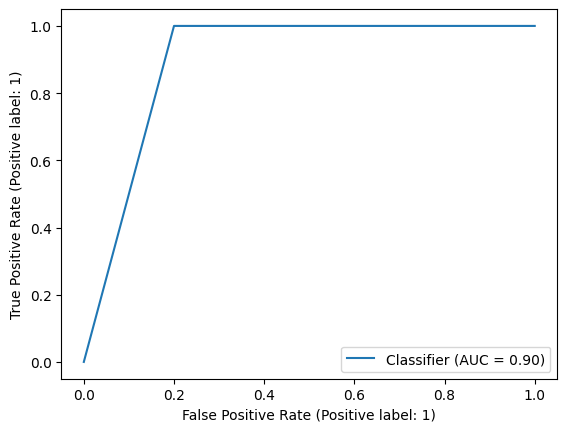

In [125]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

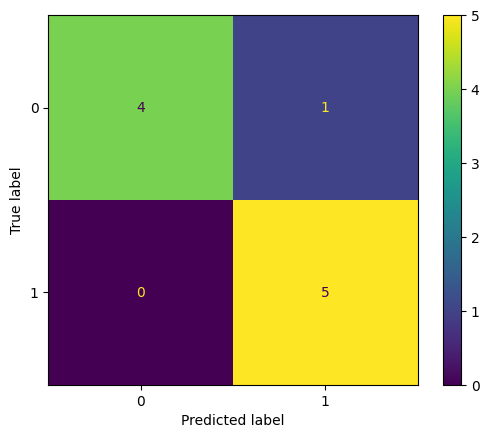

In [130]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [136]:
from keras.models import load_model
model = load_model('odcnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
normal disc


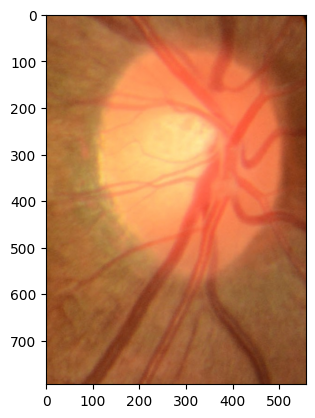

In [151]:
from keras.preprocessing import image

test_img_path = '/kaggle/input/optic-disc-photos-split-image-dataset/split/test/normal_discs/Label 19.JPG'
img = image.load_img(test_img_path, target_size = (64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction<=0.5:
    print('normal disc')
else:
    print('possibly glaucomatous disc')

import matplotlib.pyplot as plt
test_image1 = image.load_img('/kaggle/input/optic-disc-photos-split-image-dataset/split/test/normal_discs/Label 19.JPG')
plt.imshow(test_image1)                     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
possibly glaucomatous disc


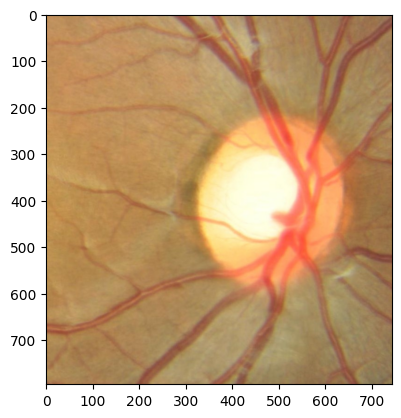

In [153]:
from keras.preprocessing import image

test_img_path = '/kaggle/input/optic-disc-photos-split-image-dataset/split/test/possibly_glaucomatous/Large 30.JPG'
img = image.load_img(test_img_path, target_size = (64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction<=0.5:
    print('normal disc')
else:
    print('possibly glaucomatous disc')

import matplotlib.pyplot as plt
test_image2 = image.load_img('/kaggle/input/optic-disc-photos-split-image-dataset/split/test/possibly_glaucomatous/Large 30.JPG')
plt.imshow(test_image2)                     

In [141]:
testimages.class_indices

{'normal_discs': 0, 'possibly_glaucomatous': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
normal disc


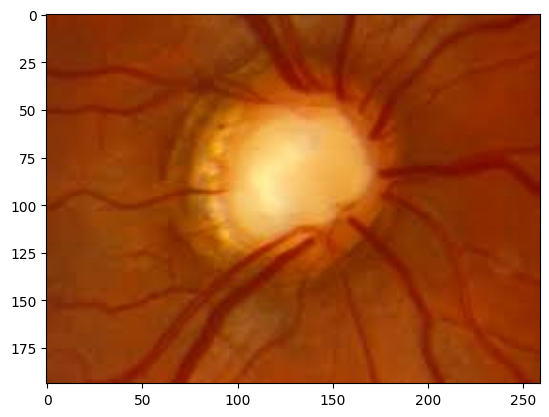

In [157]:
from keras.preprocessing import image

unknown_img_path = '/kaggle/input/unknown-od-fundus-images/glaucomatous OD image.jpg'
img = image.load_img(unknown_img_path, target_size = (64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction<=0.5:
    print('normal disc')
else:
    print('possibly glaucomatous disc')

import matplotlib.pyplot as plt
unknown_image1 = image.load_img('/kaggle/input/unknown-od-fundus-images/glaucomatous OD image.jpg')
plt.imshow(unknown_image1)                     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
normal disc


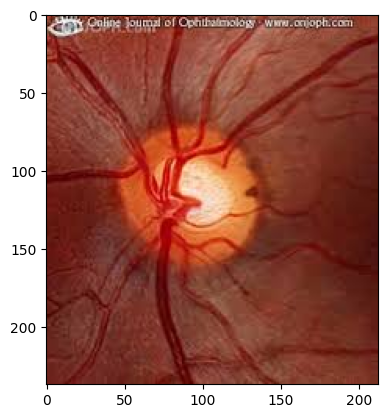

In [155]:
from keras.preprocessing import image

unknown_img_path = '/kaggle/input/unknown-od-fundus-images/unknown normal OD image.jpg'
img = image.load_img(unknown_img_path, target_size = (64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction<=0.5:
    print('normal disc')
else:
    print('possibly glaucomatous disc')

import matplotlib.pyplot as plt
unknown_image1 = image.load_img('/kaggle/input/unknown-od-fundus-images/unknown normal OD image.jpg')
plt.imshow(unknown_image1)                     